In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mydata=pd.read_csv("SampleSuperstore.csv")

In [4]:
mydata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
mydata.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
mydata.shape

(9994, 13)

In [6]:
mydata.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
mydata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
mydata.isnull().sum()  #returns column-wise sum of missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
mydata['Region'].value_counts()  #returns count of unique values


West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
mydata.duplicated().sum()  #helps in analyzing duplicate values

17

In [16]:
mydata.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


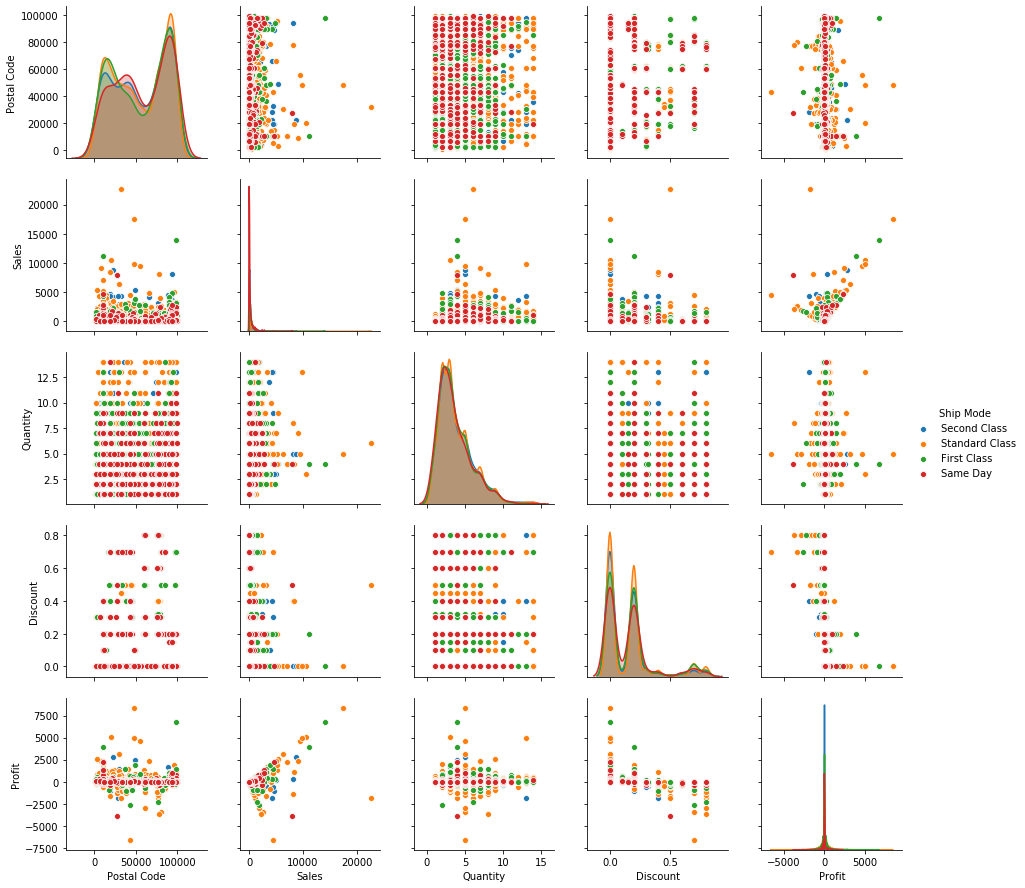

In [6]:
sns.pairplot(mydata, hue="Ship Mode")  # to plot multiple pairwise bivariate distributions


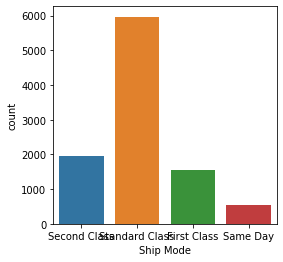

In [7]:

plt.figure(figsize=(4,4))    #Analysing of shipping mode
sns.countplot(x=mydata['Ship Mode'])
plt.show()

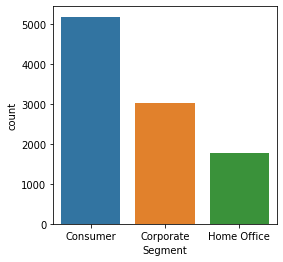

In [8]:
plt.figure(figsize=(4,4))  #Analysing of Segments
sns.countplot(x=mydata['Segment'])
plt.show()

In [9]:
mydata['City'].value_counts()  #returns count of unique values

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Milwaukee         45
                ... 
Romeoville         1
Layton             1
Orland Park        1
Murrieta           1
Missouri City      1
Elyria             1
Waterloo           1
Conroe             1
Kissimmee          1
Norfolk            1
Commerce City      1
Littleton          1
Manhattan          1
Rock Hill          1
Abilene            1
Missoula           1
Montebello   

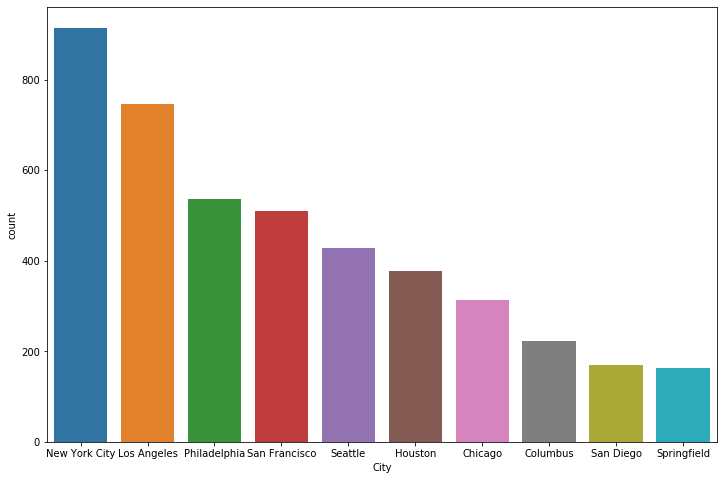

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x=mydata['City'],order=(mydata["City"].value_counts().head(10)).index)
plt.show()


In [11]:
dftop10 = mydata.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10  #Grouping by Quantity of Cities

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
221,Jupiter,1
222,Keller,2
171,Grand Island,2
32,Baytown,2
203,Holyoke,2


In [12]:
dftop10 = dftop10.head(10)  #Most ordering cities
dftop10.reset_index(drop=True,inplace=True)
dftop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


Text(0, 0.5, 'Quantities ordered')

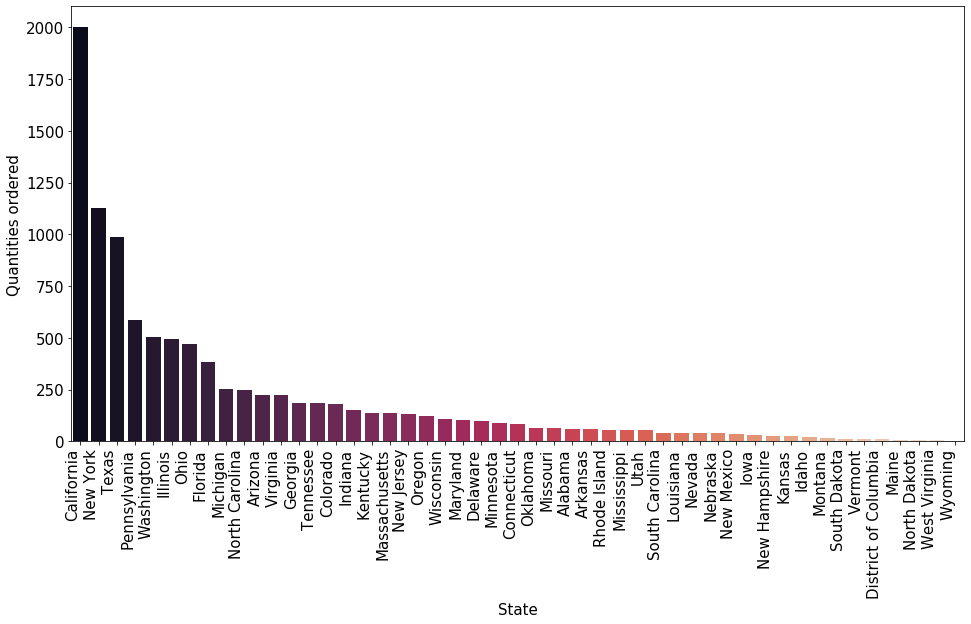

In [13]:
plt.figure(figsize = (16, 8))  #Locationwise analysis
sns.countplot(x = mydata['State'],palette = 'rocket', order = (mydata['State'].value_counts().head(50)).index)
plt.xticks(rotation=90,ha='right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Quantities ordered',fontsize=15)

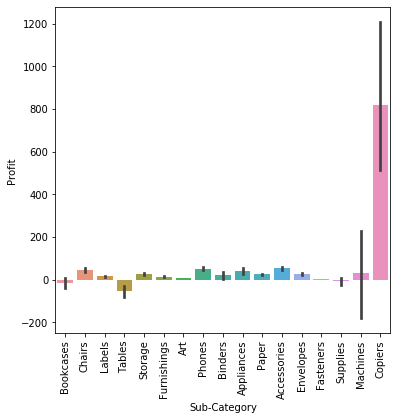

In [14]:

plt.figure(figsize=(6,6))
sns.barplot(x=mydata['Sub-Category'], y=mydata['Profit'])
plt.xticks(rotation=90)
plt.show()

C:\Users\user\python kush\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-4.575000000000003, 0.5, 'Profit')

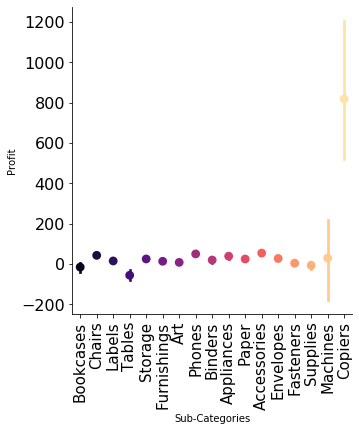

In [15]:
sns.factorplot('Sub-Category','Profit',data=mydata,palette='magma')
plt.xticks(rotation=90,size=15)
plt.yticks(size=16)
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')